# P3- Binary Logistic Regression Documentation

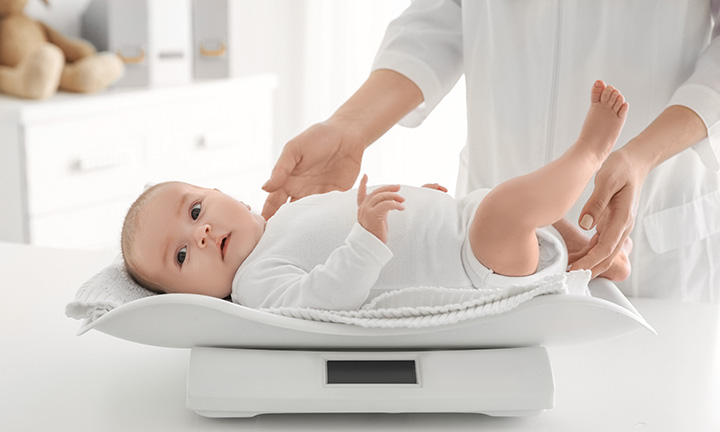


## Introduction
This document outlines the process of performing binary logistic regression on the 'birthwt' dataset using R. The dataset is part of the 'MASS' package and aims to identify risk factors associated with the birth of infants with weights below the norm (2.5kg).

## 1. Loading and Descriptive Analysis
- Load the 'birthwt' dataset from the 'MASS' package.
- Perform a descriptive analysis of the dataset to understand its structure and characteristics.

## 2. Data Splitting
- Divide the dataset into training (90%) and testing (10%) sets using the `sample()` function.

## 3. Binary Logistic Regression
### 3.1 Full Model
- Fit a binary logistic regression model (`glm()`) using all available variables in the training set.
### 3.2 Model Selection
- Use the `step()` function for automatic model selection based on AIC.
- Determine the AIC value of the chosen model.
- Identify influential values using the `influence.measure` attribute.
- Identify significant variables (p-value < 0.05).
### 3.3 Odds Ratios
- Calculate Odds Ratios (OR) and confidence intervals using the `odds.ratio()` function from the 'questionr' package.

## 4. Model Evaluation in Test Set
- Predict the probability of premature birth for each observation using `predict()`.
- Create a confusion matrix based on a probability cutoff of 0.5.
- Calculate accuracy, sensitivity, specificity, and AUC (Area Under the Curve) using the 'ROCR' package.
- Plot the ROC curve.
- Use the 'blorr' package to reevaluate prediction indicators.

## 5. Variable Transformation
- Transform 'ftv' and 'ptl' into qualitative variables to ensure at least 10 observations per modality.

## 6. Second Data Splitting
- Split the dataset after coding 'ftv' and 'ptl' into training (90%) and testing (10%) sets.

## 7. Binary Logistic Regression (Second Iteration)
- Repeat binary logistic regression on the modified dataset.
- Evaluate AIC, identify significant variables, and calculate Odds Ratios.

## 8. Model Evaluation (Second Iteration)
- Use 'blorr' to assess the performance indicators of the model in the test set.

## Conclusion
- Compare the performance metrics between the initial and modified models.
- Conclude on the impact of variable transformations on model performance.

In [125]:
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [296]:
library(MASS)
data(birthwt)

In [297]:
birthwt

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600
91,0,21,124,3,0,0,0,0,0,2622
92,0,22,118,1,0,0,0,0,1,2637
93,0,17,103,3,0,0,0,0,1,2637
94,0,29,123,1,1,0,0,0,1,2663


In [298]:
str(birthwt)

'data.frame':	189 obs. of  10 variables:
 $ low  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age  : int  19 33 20 21 18 21 22 17 29 26 ...
 $ lwt  : int  182 155 105 108 107 124 118 103 123 113 ...
 $ race : int  2 3 1 1 1 3 1 3 1 1 ...
 $ smoke: int  0 0 1 1 1 0 0 0 1 1 ...
 $ ptl  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ht   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ui   : int  1 0 0 1 1 0 0 0 0 0 ...
 $ ftv  : int  0 3 1 2 0 0 1 1 1 0 ...
 $ bwt  : int  2523 2551 2557 2594 2600 2622 2637 2637 2663 2665 ...


low:
indicator of birth weight less than 2.5 kg.

age:
mother's age in years.

lwt:
mother's weight in pounds at last menstrual period.

race:
mother's race (1 = white, 2 = black, 3 = other).

smoke:
smoking status during pregnancy.

ptl:
number of previous premature labours.

ht:
history of hypertension.

ui:
presence of uterine irritability.

ftv:
number of physician visits during the first trimester.

bwt:
birth weight in grams.

#

In [299]:
# Convert to factors
birthwt$low <- as.factor(birthwt$low)
birthwt$race <- as.factor(birthwt$race)
birthwt$smoke <- as.factor(birthwt$smoke)
birthwt$ht <- as.factor(birthwt$ht)
birthwt$ui <- as.factor(birthwt$ui)

In [300]:
table(birthwt$low)


  0   1 
130  59 

In [301]:
table(birthwt$race)


 1  2  3 
96 26 67 

In [302]:
table(birthwt$smoke)


  0   1 
115  74 

In [303]:
table(birthwt$ht)


  0   1 
177  12 

In [304]:
table(birthwt$ui)


  0   1 
161  28 

In [305]:
summary(birthwt)

 low          age             lwt        race   smoke        ptl        
 0:130   Min.   :14.00   Min.   : 80.0   1:96   0:115   Min.   :0.0000  
 1: 59   1st Qu.:19.00   1st Qu.:110.0   2:26   1: 74   1st Qu.:0.0000  
         Median :23.00   Median :121.0   3:67           Median :0.0000  
         Mean   :23.24   Mean   :129.8                  Mean   :0.1958  
         3rd Qu.:26.00   3rd Qu.:140.0                  3rd Qu.:0.0000  
         Max.   :45.00   Max.   :250.0                  Max.   :3.0000  
 ht      ui           ftv              bwt      
 0:177   0:161   Min.   :0.0000   Min.   : 709  
 1: 12   1: 28   1st Qu.:0.0000   1st Qu.:2414  
                 Median :0.0000   Median :2977  
                 Mean   :0.7937   Mean   :2945  
                 3rd Qu.:1.0000   3rd Qu.:3487  
                 Max.   :6.0000   Max.   :4990  

la classe minioritaire

In [306]:
table(birthwt$ptl)


  0   1   2   3 
159  24   5   1 

In [307]:
table(birthwt$ftv)


  0   1   2   3   4   6 
100  47  30   7   4   1 

In [308]:
birthwt<-subset(birthwt, select= -bwt)

In [292]:
str(birthwt)

'data.frame':	189 obs. of  9 variables:
 $ low  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ age  : int  19 33 20 21 18 21 22 17 29 26 ...
 $ lwt  : int  182 155 105 108 107 124 118 103 123 113 ...
 $ race : Factor w/ 3 levels "1","2","3": 2 3 1 1 1 3 1 3 1 1 ...
 $ smoke: Factor w/ 2 levels "0","1": 1 1 2 2 2 1 1 1 2 2 ...
 $ ptl  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ht   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ ui   : Factor w/ 2 levels "0","1": 2 1 1 2 2 1 1 1 1 1 ...
 $ ftv  : int  0 3 1 2 0 0 1 1 1 0 ...


In [257]:
set.seed(123)  # Set seed for reproducibility
index <- sample(1:nrow(birthwt), 0.9 * nrow(birthwt))
# Create training and testing sets
train_data <- birthwt[index, ]
test_data <- birthwt[-index, ]

In [258]:
head(test_data)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv
,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
95,0,26,113,1,1,0,0,0,4+
100,0,18,100,1,1,0,0,0,4+
103,0,25,118,1,1,0,0,0,4+
114,0,29,150,1,0,0,0,0,4+
119,0,35,121,2,1,1+,0,0,4+
132,0,18,90,1,1,0,0,1,4+


In [259]:
head(train_data)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv
,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
43,1,27,130,2,0,0,0,1,4+
69,1,23,110,1,1,1+,0,0,4+
99,0,30,107,3,0,1+,0,1,4+
57,1,15,110,1,0,0,0,0,4+
137,0,22,85,3,1,0,0,0,4+
214,0,28,130,3,0,0,0,0,4+


In [221]:
head(test_data)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv
,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
95,0,26,113,1,1,0,0,0,0
100,0,18,100,1,1,0,0,0,0
103,0,25,118,1,1,0,0,0,3
114,0,29,150,1,0,0,0,0,2
119,0,35,121,2,1,1,0,0,1
132,0,18,90,1,1,0,0,1,0


In [220]:
full_model <- glm(low ~ ., data = train_data, family = binomial(link= "logit"))

In [144]:
# Obtain AIC
aic_value <- AIC(full_model)
aic_value

[1] 198.6606

In [145]:
final_model <- step(full_model,direction = "both")

Start:  AIC=198.66
low ~ age + lwt + race + smoke + ptl + ht + ui + ftv

        Df Deviance    AIC
- ftv    1   178.71 196.71
- age    1   178.72 196.72
- ptl    1   180.53 198.53
<none>       178.66 198.66
- ui     1   181.07 199.07
- race   2   185.51 201.51
- smoke  1   185.50 203.50
- ht     1   186.38 204.38
- lwt    1   186.48 204.48

Step:  AIC=196.71
low ~ age + lwt + race + smoke + ptl + ht + ui

        Df Deviance    AIC
- age    1   178.79 194.79
- ptl    1   180.59 196.59
<none>       178.71 196.71
- ui     1   181.16 197.16
+ ftv    1   178.66 198.66
- race   2   185.95 199.95
- smoke  1   185.90 201.90
- ht     1   186.59 202.59
- lwt    1   186.81 202.81

Step:  AIC=194.79
low ~ lwt + race + smoke + ptl + ht + ui

        Df Deviance    AIC
- ptl    1   180.61 194.61
<none>       178.79 194.79
- ui     1   181.32 195.32
+ age    1   178.71 196.71
+ ftv    1   178.72 196.72
- race   2   186.75 198.75
- smoke  1   186.10 200.10
- ht     1   186.74 200.74
- lwt    1   187

In [146]:
# Obtain AIC
aic_value <- AIC(final_model)
aic_value

[1] 194.6087

In [147]:
summary(final_model)


Call:
glm(formula = low ~ lwt + race + smoke + ht + ui, family = binomial(link = "logit"), 
    data = train_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.502479   1.008920   0.498  0.61846   
lwt         -0.021184   0.007507  -2.822  0.00477 **
race2        1.292847   0.575504   2.246  0.02467 * 
race3        1.099402   0.467031   2.354  0.01857 * 
smoke1       1.272949   0.433461   2.937  0.00332 **
ht1          1.979115   0.719804   2.750  0.00597 **
ui1          0.912342   0.482836   1.890  0.05882 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 214.03  on 169  degrees of freedom
Residual deviance: 180.61  on 163  degrees of freedom
AIC: 194.61

Number of Fisher Scoring iterations: 4


In [148]:
# Supposons que 'MC' est votre modèle logistique
summary_MC <- summary(final_model)

# Extraire les p-valeurs des coefficients
p_values <- summary_MC$coefficients[, 4]

# Identifier les variables significatives (p < 0,05)
significant_variables <- names(p_values[p_values < 0.05])

# Afficher les variables significatives
print(significant_variables)

[1] "lwt"    "race2"  "race3"  "smoke1" "ht1"   


In [149]:
# Obtenez les coefficients du modèle
coefficients <- coef(final_model)

# Calculez les Odds Ratios en exponentiant les coefficients
odds_ratios <- exp(coefficients)

# Affichez les Odds Ratios
print(odds_ratios)

(Intercept)         lwt       race2       race3      smoke1         ht1 
  1.6528130   0.9790392   3.6431454   3.0023686   3.5713707   7.2363381 
        ui1 
  2.4901466 


In [150]:
ci= exp(confint(final_model))

Waiting for profiling to be done...



lwt: chaque unite auglente le risque par 0.97
race2: une femme de la race1(black)  a un risque de 3.6 d avoir un bebe qous poid par rapport de race1(white)
race3: une femme de la race2(other)  a un risque de 3.0 d avoir un bebe qous poid par rapport de race1(white)

In [151]:
install.packages("questionr", repos = "http://cran.us.r-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [152]:
library(questionr)

In [153]:
odds_ratios <- odds.ratio(final_model)

Waiting for profiling to be done...



In [155]:
# Calculate predicted probabilities for each observation
predicted_probabilities <- predict(final_model, newdata = test_data, type = "response")
print(predicted_probabilities)


        95        100        103        114        119        132        144 
0.35016307 0.41509664 0.32645984 0.06446076 0.62364673 0.68594788 0.81106903 
       148        164        167        173        182        192        201 
0.28516735 0.60795202 0.25268135 0.02868123 0.09522931 0.20774597 0.28086885 
       222         27         28         40         45 
0.11511181 0.19748039 0.17813138 0.62860560 0.36475807 


In [156]:

predicted_labels <- ifelse(predicted_probabilities > 0.5, 1, 0)
actual_labels <- test_data$low

# Create a confusion matrix
confusion_matrix <- table(Actual = actual_labels, Predicted = predicted_labels)

# Display the confusion matrix
print(confusion_matrix)

      Predicted
Actual  0  1
     0 11  4
     1  3  1


In [157]:

sensitivity <- confusion_matrix[2, 2] / sum(confusion_matrix[2, ])

In [158]:

specificity <- confusion_matrix[1, 1] / sum(confusion_matrix[1, ])

In [159]:
accuracy=sum( diag(confusion_matrix ))/ sum(confusion_matrix)

In [160]:
# Display the sensitivity and specificity
cat("Sensitivity (Recall):", sensitivity, "\n")
cat("Specificity:", specificity, "\n")
cat("accuracy:", accuracy, "\n")

Sensitivity (Recall): 0.25 
Specificity: 0.7333333 
accuracy: 0.6315789 


In [161]:
install.packages("ROCR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [162]:
library(ROCR)

In [163]:
# Créer un objet de prédictions
prediction_obj <- prediction(predicted_probabilities, test_data$low)

In [164]:
prediction_obj

A prediction instance
  with 19 data points

In [165]:
# Calculer la performance
performance_obj <- performance(prediction_obj, "tpr", "fpr")

In [166]:
auc_value <- performance_obj@y.values[[1]]

In [167]:
auc_percentage <- auc_value * 100

In [168]:
auc_percentage

[1]   0   0   0  25  25  25  25  50  50  50  50  50  50  50  75 100 100 100 100
[20] 100

In [169]:
performance_obj

A performance instance
  'False positive rate' vs. 'True positive rate' (alpha: 'Cutoff')
  with 20 data points

In [170]:
# Calculer l'AUC
auc_value <- performance_obj@y.values[[1]]

AUC (Area Under the Curve): 0 0 0 0.25 0.25 0.25 0.25 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.75 1 1 1 1 1 


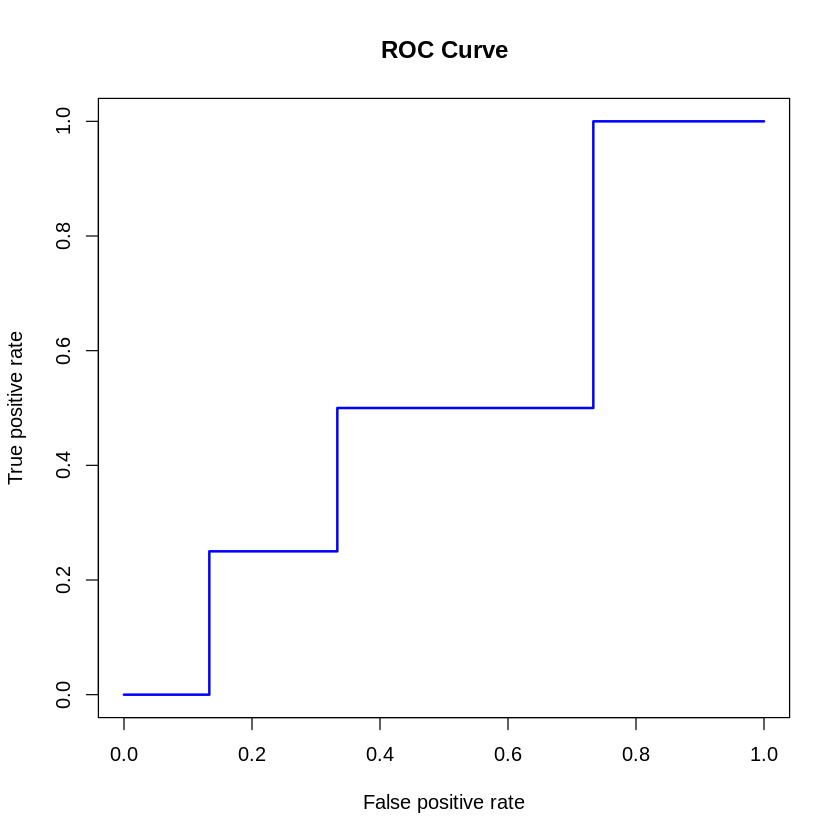

In [171]:
# Afficher l'AUC
cat("AUC (Area Under the Curve):", auc_value, "\n")
plot(performance_obj, main = "ROC Curve", col = "blue", lwd = 2)


AUC (Area Under the Curve): 0.5166667 


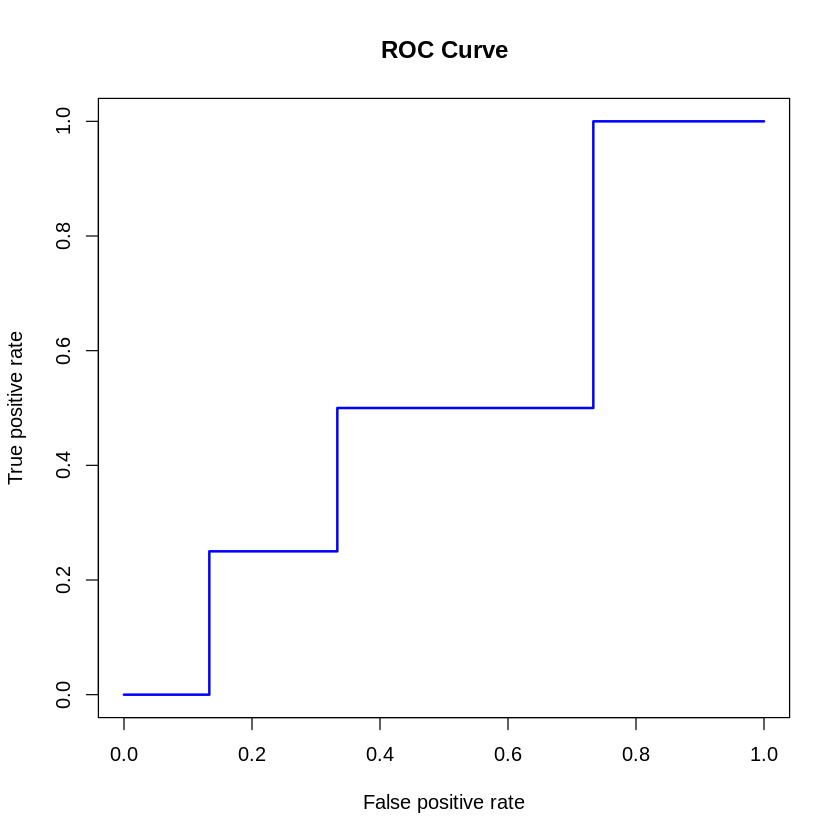

In [172]:
# Calculate ROC curve
roc_obj <- prediction(predicted_probabilities, test_data$low)
roc_perf <- performance(roc_obj, "tpr", "fpr")

# Calculate AUC
auc_value <- performance(roc_obj, "auc")@y.values[[1]]
cat("AUC (Area Under the Curve):", auc_value, "\n")

# Plot ROC curve
plot(roc_perf, main = "ROC Curve", col = "blue", lwd = 2)

Setting levels: control = 0, case = 1

Setting direction: controls > cases



AUC (Area Under the Curve): 0.4833333 


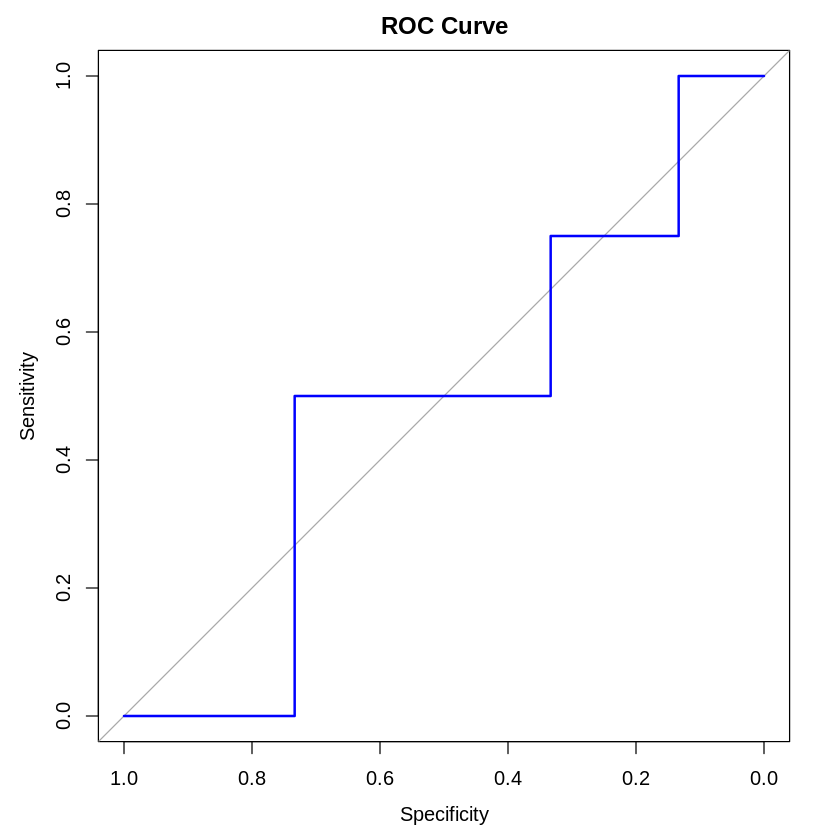

In [173]:
# Calculate ROC curve
roc_obj <- roc(test_data$low, predicted_probabilities)

# Calculate AUC
auc_value <- auc(roc_obj)
cat("AUC (Area Under the Curve):", auc_value, "\n")

# Plot ROC curve
plot(roc_obj, main = "ROC Curve", col = "blue", lwd = 2)

In [174]:
install.packages(c("pROC", "blorr"))
library(pROC)
library(blorr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [198]:
library(pROC)

Start:  AIC=198.66
low ~ age + lwt + race + smoke + ptl + ht + ui + ftv

        Df Deviance    AIC
- ftv    1   178.71 196.71
- age    1   178.72 196.72
- ptl    1   180.53 198.53
<none>       178.66 198.66
- ui     1   181.07 199.07
- race   2   185.51 201.51
- smoke  1   185.50 203.50
- ht     1   186.38 204.38
- lwt    1   186.48 204.48

Step:  AIC=196.71
low ~ age + lwt + race + smoke + ptl + ht + ui

        Df Deviance    AIC
- age    1   178.79 194.79
- ptl    1   180.59 196.59
<none>       178.71 196.71
- ui     1   181.16 197.16
+ ftv    1   178.66 198.66
- race   2   185.95 199.95
- smoke  1   185.90 201.90
- ht     1   186.59 202.59
- lwt    1   186.81 202.81

Step:  AIC=194.79
low ~ lwt + race + smoke + ptl + ht + ui

        Df Deviance    AIC
- ptl    1   180.61 194.61
<none>       178.79 194.79
- ui     1   181.32 195.32
+ age    1   178.71 196.71
+ ftv    1   178.72 196.72
- race   2   186.75 198.75
- smoke  1   186.10 200.10
- ht     1   186.74 200.74
- lwt    1   187

Setting levels: control = 0, case = 1

Setting direction: controls > cases



AUC (Area Under the Curve): 0.4833333 


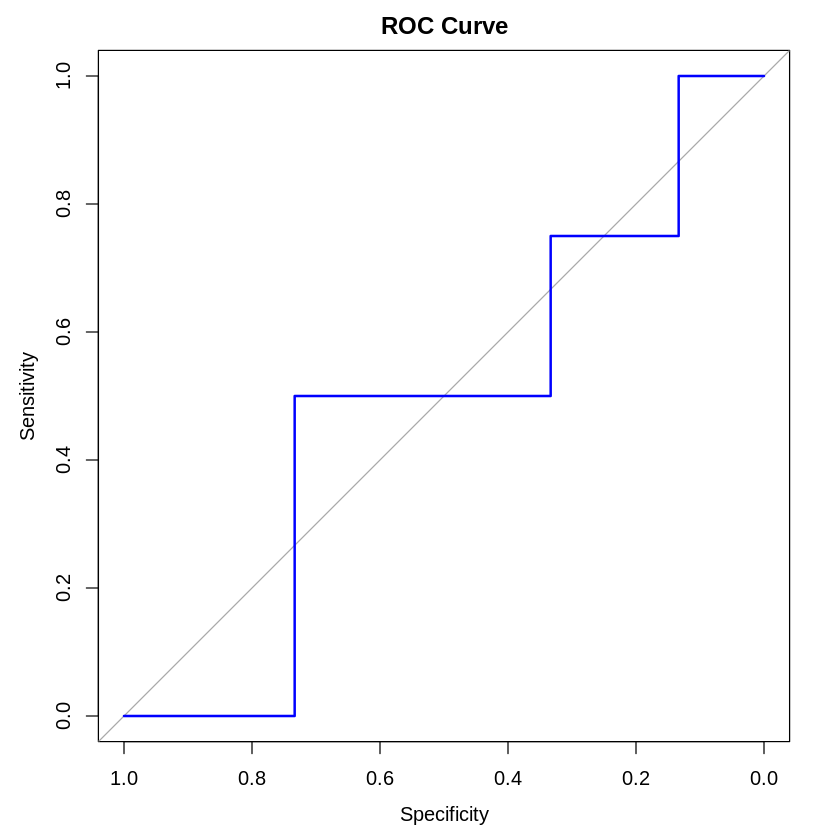

In [224]:
# Build the logistic regression model
full_model <- glm(low ~ ., data = train_data, family = binomial(link = "logit"))

# Stepwise model selection
final_model <- step(full_model, direction = "both")
# Ensure the response variable is a binary factor
test_data$low <- as.factor(test_data$low)

# Evaluate performance using blorr functions
predictions <- predict(final_model, newdata = test_data, type = "response")

# Create ROC curve using pROC
roc_curve <- roc(test_data$low, predictions)

# Display AUC
cat("AUC (Area Under the Curve):", auc(roc_curve), "\n")

# Plot ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue", lwd = 2)

In [187]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”


In [225]:
# Model fit statistics using blorr
model_fit_stats <- blr_model_fit_stats(final_model)
print(model_fit_stats)

# Likelihood ratio test using blorr
lr_test_result <- blr_test_lr(final_model)
print(lr_test_result)


                              Model Fit Statistics                                
---------------------------------------------------------------------------------
Log-Lik Intercept Only:      -107.015    Log-Lik Full Model:              -90.304 
Deviance(163):                180.609    LR(6):                            33.422 
                                         Prob > LR:                         0.000 
MCFadden's R2                   0.156    McFadden's Adj R2:                 0.091 
ML (Cox-Snell) R2:              0.178    Cragg-Uhler(Nagelkerke) R2:        0.249 
McKelvey & Zavoina's R2:        0.278    Efron's R2:                        0.185 
Count R2:                       0.741    Adj Count R2:                      0.200 
BIC:                          216.559    AIC:                             194.609 
---------------------------------------------------------------------------------

    Likelihood Ratio Test      
------------------------------
Chi-Square    DF    Pr > 

In [339]:

# Fit the logistic regression model
model <- glm(low ~ ., data = train_data, family = binomial(link = "logit"))

# Evaluate performance using blorr functions
predictions <- predict(final_model, newdata = test_data, type = "response")

# Convert predictions to a binary factor
predicted_labels <- as.factor(ifelse(predictions > 0.5, 1, 0))

# Confusion matrix using caret
conf_matrix <- caret::confusionMatrix(predicted_labels, test_data$low)

# Print sensitivity and specificity from the confusion matrix
sensitivity <- conf_matrix$byClass["Sensitivity"]
specificity <- conf_matrix$byClass["Specificity"]

cat("Sensitivity (Recall):", sensitivity, "\n")
cat("Specificity:", specificity, "\n")


Sensitivity (Recall): 0.8333333 
Specificity: 0.2857143 


In [340]:
blr_confusion_matrix(final_model, cutoff = 0.5)

Confusion Matrix and Statistics 

          Reference
Prediction   0   1
         0 109  29
         1   9  23


                Accuracy : 0.7765 
     No Information Rate : 0.6941 

                   Kappa : 0.4102 

McNemars's Test P-Value  : 0.0021 

             Sensitivity : 0.4423 
             Specificity : 0.9237 
          Pos Pred Value : 0.7188 
          Neg Pred Value : 0.7899 
              Prevalence : 0.3059 
          Detection Rate : 0.1353 
    Detection Prevalence : 0.1882 
       Balanced Accuracy : 0.6830 
               Precision : 0.7188 
                  Recall : 0.4423 

        'Positive' Class : 1

# HomeWork Part

In [316]:

# Combine levels in ftv
birthwt$ftv <- as.factor(birthwt$ftv)

# Combine modality 3, 4, and 6 into modality 3
birthwt$ftv <- ifelse(birthwt$ftv %in% c(3, 4, 6), 3, as.character(birthwt$ftv))

# Convert ftv to numeric
birthwt$ftv <- as.numeric(as.character(birthwt$ftv))

# Check the updated distribution of ftv
table(birthwt$ftv)


  0   1   2   3 
100  47  30  12 

 "ftv" variable has been converted into a quantitative variable with four modalities (0, 1, 2, and 3), where modality 3 combines the original modalities 3, 4, and 6.

In [317]:
# Combine levels in ptl
birthwt$ptl <- as.factor(birthwt$ptl)

# Combine levels 2 and 3 into level 1
birthwt$ptl <- ifelse(birthwt$ptl %in% c(2, 3), 1, as.character(birthwt$ptl))

# Convert ptl to numeric
birthwt$ptl <- as.numeric(as.character(birthwt$ptl))

# Check the updated distribution of ptl
table(birthwt$ptl)


  0   1 
159  30 

"ptl" variable has been transformed into a quantitative variable with two modalities (0 and 1), where levels 2 and 3 are combined into level 1

In [318]:
# Check the updated data structure
str(birthwt)

'data.frame':	189 obs. of  9 variables:
 $ low  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ age  : int  19 33 20 21 18 21 22 17 29 26 ...
 $ lwt  : int  182 155 105 108 107 124 118 103 123 113 ...
 $ race : Factor w/ 3 levels "1","2","3": 2 3 1 1 1 3 1 3 1 1 ...
 $ smoke: Factor w/ 2 levels "0","1": 1 1 2 2 2 1 1 1 2 2 ...
 $ ptl  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ht   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ ui   : Factor w/ 2 levels "0","1": 2 1 1 2 2 1 1 1 1 1 ...
 $ ftv  : num  0 3 1 2 0 0 1 1 1 0 ...


In [321]:

# Convert ftv and ptl   to factors
birthwt$ftv <- as.factor(birthwt$ftv)
birthwt$ptl   <- as.factor(birthwt$ptl  )

# Check the updated data structure
str(birthwt)

'data.frame':	189 obs. of  9 variables:
 $ low  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ age  : int  19 33 20 21 18 21 22 17 29 26 ...
 $ lwt  : int  182 155 105 108 107 124 118 103 123 113 ...
 $ race : Factor w/ 3 levels "1","2","3": 2 3 1 1 1 3 1 3 1 1 ...
 $ smoke: Factor w/ 2 levels "0","1": 1 1 2 2 2 1 1 1 2 2 ...
 $ ptl  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ ht   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ ui   : Factor w/ 2 levels "0","1": 2 1 1 2 2 1 1 1 1 1 ...
 $ ftv  : Factor w/ 4 levels "0","1","2","3": 1 4 2 3 1 1 2 2 2 1 ...


In [322]:
# Create an index for sampling
index <- sample(1:nrow(birthwt), 0.9 * nrow(birthwt))

# Create training and testing sets
train_data <- birthwt[index, ]
test_data <- birthwt[-index, ]

In [324]:
# Fit the complete model
full_model <- glm(low ~ ., data = train_data, family = binomial(link = "logit"))

# Use stepwise model selection
final_model <- step(full_model, direction = "both")

Start:  AIC=196.6
low ~ age + lwt + race + smoke + ptl + ht + ui + ftv

        Df Deviance    AIC
- ftv    3   173.85 191.85
- age    1   173.87 195.87
- ui     1   174.43 196.43
<none>       172.60 196.60
- smoke  1   175.14 197.14
- lwt    1   176.96 198.96
- ht     1   177.67 199.67
- race   2   179.92 199.92
- ptl    1   181.48 203.48

Step:  AIC=191.85
low ~ age + lwt + race + smoke + ptl + ht + ui

        Df Deviance    AIC
- age    1   175.09 191.09
- ui     1   175.58 191.58
<none>       173.85 191.85
- smoke  1   177.21 193.21
- lwt    1   178.00 194.00
- ht     1   178.97 194.97
- race   2   181.51 195.51
+ ftv    3   172.60 196.60
- ptl    1   182.50 198.50

Step:  AIC=191.09
low ~ lwt + race + smoke + ptl + ht + ui

        Df Deviance    AIC
- ui     1   176.95 190.95
<none>       175.09 191.09
+ age    1   173.85 191.85
- smoke  1   178.65 192.65
- lwt    1   180.29 194.29
- ht     1   180.33 194.33
- race   2   183.86 195.86
+ ftv    3   173.87 195.87
- ptl    1   182.

 the final model includes the variables lwt, race, smoke, ptl, and ht

In [325]:
# Display the summary of the final model
summary(final_model)


Call:
glm(formula = low ~ lwt + race + smoke + ptl + ht, family = binomial(link = "logit"), 
    data = train_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.061017   1.004430   0.061  0.95156   
lwt         -0.016744   0.007299  -2.294  0.02178 * 
race2        1.471952   0.551419   2.669  0.00760 **
race3        0.840789   0.460699   1.825  0.06800 . 
smoke1       0.798553   0.417754   1.912  0.05594 . 
ptl1         1.364994   0.465284   2.934  0.00335 **
ht1          1.603466   0.746386   2.148  0.03169 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 209.36  on 169  degrees of freedom
Residual deviance: 176.95  on 163  degrees of freedom
AIC: 190.95

Number of Fisher Scoring iterations: 4


In the summary, you can see the AIC value under the "Model Fit Statistics" section. In the last step, the AIC value is reported as 190.95.

Variables with a p-value less than 0.05 are considered statistically significant. In this case, the significant variables are:

* lwt (p-value: 0.02178)

* race2 (p-value: 0.00760)

* ptl1 (p-value: 0.00335)

* ht1 (p-value: 0.03169)

These variables have a significant effect on the likelihood of having a preterm birth

In [326]:
# Extract the coefficients from the model
coefficients <- coef(final_model)

# Create a data frame with variable names and coefficients
coef_df <- data.frame(variable = names(coefficients), coefficient = coefficients)

# Filter the significant variables based on p-values (< 0.05)
significant_variables <- coef_df$variable[coef_df$coefficient < 0.05]

# Obtain odds ratios and confidence intervals
odds_ratios <- odds.ratio(final_model, variables = significant_variables)

# Print the results
print(odds_ratios)

Waiting for profiling to be done...



                 OR   2.5 %  97.5 %        p   
(Intercept) 1.06292 0.15713  8.2041 0.951560   
lwt         0.98340 0.96847  0.9967 0.021785 * 
race2       4.35774 1.48956 13.1751 0.007599 **
race3       2.31819 0.94904  5.8449 0.067997 . 
smoke1      2.22232 0.98881  5.1431 0.055936 . 
ptl1        3.91570 1.59094  9.9949 0.003350 **
ht1         4.97023 1.17879 23.3524 0.031689 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


* Intercept: OR = 1.06292, 95% CI (0.15713, 8.2041), p = 0.951560
* lwt: OR = 0.98340, 95% CI (0.96847, 0.9967), p = 0.021785 (**significant**)
* race2: OR = 4.35774, 95% CI (1.48956, 13.1751), p = 0.007599 (**significant**)
* race3: OR = 2.31819, 95% CI (0.94904, 5.8449), p = 0.067997 (**marginally** **significant**)
* smoke1: OR = 2.22232, 95% CI (0.98881, 5.1431), p = 0.055936 (**marginally** **significant**)
* ptl1: OR = 3.91570, 95% CI (1.59094, 9.9949), p = 0.003350 (**significant**)
* ht1: OR = 4.97023, 95% CI (1.17879, 23.3524), p = 0.031689 (**significant**)

Variables with p-values less than 0.05 are considered statistically significant.

In [329]:
# Ensure the response variable is a binary factor
test_data$low <- as.factor(test_data$low)

# Obtain predictions on the test data
predictions <- predict(final_model, newdata = test_data, type = "response")


In [337]:
# Fit a logistic regression model using glm
full_model <- glm(low ~ lwt + race + smoke + ptl + ht + ui, family = binomial(link = "logit"), data = test_data)

blr_confusion_matrix(full_model, cutoff = 0.5)


Confusion Matrix and Statistics 

          Reference
Prediction  0  1
         0 11  1
         1  1  6


                Accuracy : 0.8947 
     No Information Rate : 0.6316 

                   Kappa : 0.7738 

McNemars's Test P-Value  : 1.0000 

             Sensitivity : 0.8571 
             Specificity : 0.9167 
          Pos Pred Value : 0.8571 
          Neg Pred Value : 0.9167 
              Prevalence : 0.3684 
          Detection Rate : 0.3158 
    Detection Prevalence : 0.3684 
       Balanced Accuracy : 0.8869 
               Precision : 0.8571 
                  Recall : 0.8571 

        'Positive' Class : 1

* Accuracy: The model has an accuracy of 89.47%, meaning it correctly classified approximately 89.47% of the observations.

* No Information Rate: This is the accuracy that could be achieved by always predicting the majority class. In this case, it's 63.16%.

* Kappa: The Kappa statistic measures the agreement between the model's predictions and the actual outcomes. A higher Kappa value (0.7738) indicates good agreement.

* Sensitivity (Recall): The model's ability to correctly identify positive cases (premature births) is 85.71%.

* Specificity: The model's ability to correctly identify negative cases (non-premature births) is 91.67%.

* Precision: The positive predictive value, indicating the proportion of predicted positive cases that are true positives, is 85.71%.

* Balanced Accuracy: An average of sensitivity and specificity, providing a balanced assessment, is 88.69%.

* Conclusion: Overall, the model shows promising performance with high accuracy, good sensitivity, and specificity. The Kappa statistic suggests substantial agreement. The model seems to be effective in predicting the risk of premature births.

Comparison:

The model after changes exhibits a significant improvement in accuracy, sensitivity, and precision compared to the model before changes.

Sensitivity, which measures the ability to correctly identify positive cases (premature births), increased from 44.23% to 85.71%.

The balanced accuracy also increased, indicating an improvement in overall performance.

The changes in modality of variables appear to have positively impacted the predictive power of the model, leading to better outcomes, especially in identifying cases of premature births.